In [921]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (InputLayer, Dense, Flatten, Dropout)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from matplotlib import pyplot as plt
import seaborn as sbrn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [922]:
data = pd.read_csv('House_Price_Dataset.csv')

In [923]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [924]:
data = data[~data['Price'].isnull()]

In [925]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Address        27247 non-null  object 
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         27247 non-null  object 
 6   Seller         27247 non-null  object 
 7   Date           27247 non-null  object 
 8   Distance       27246 non-null  float64
 9   Postcode       27246 non-null  float64
 10  Rooms2         20806 non-null  float64
 11  Bathroom       20800 non-null  float64
 12  Car            20423 non-null  float64
 13  Landsize       17982 non-null  float64
 14  BuildingArea   10656 non-null  float64
 15  YearBuilt      12084 non-null  float64
 16  CouncilArea    27244 non-null  object 
 17  Latitude       20993 non-null  float64
 18  Longit

In [926]:
data['Rooms'] = (data.apply(lambda row: (row.Rooms + row.Rooms2) / 2  if row.Rooms2 else row.Rooms, axis=1))

In [927]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3.0,h,850000.0,PI,Biggin,04/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,3.5,h,1600000.0,VB,Nelson,04/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [928]:
data = data.drop(columns=['Date', 'Rooms2', 'Address'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Rooms          20806 non-null  float64
 2   Type           27247 non-null  object 
 3   Price          27247 non-null  float64
 4   Method         27247 non-null  object 
 5   Seller         27247 non-null  object 
 6   Distance       27246 non-null  float64
 7   Postcode       27246 non-null  float64
 8   Bathroom       20800 non-null  float64
 9   Car            20423 non-null  float64
 10  Landsize       17982 non-null  float64
 11  BuildingArea   10656 non-null  float64
 12  YearBuilt      12084 non-null  float64
 13  CouncilArea    27244 non-null  object 
 14  Latitude       20993 non-null  float64
 15  Longitude      20993 non-null  float64
 16  RegionName     27244 non-null  object 
 17  PropertyCount  27244 non-null  float64
dtypes: flo

<AxesSubplot:>

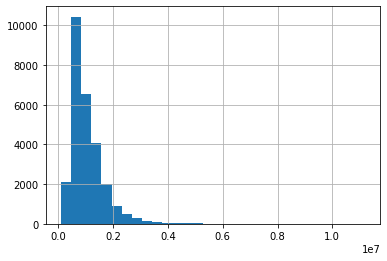

In [929]:
data['Price'].hist(bins = 30)

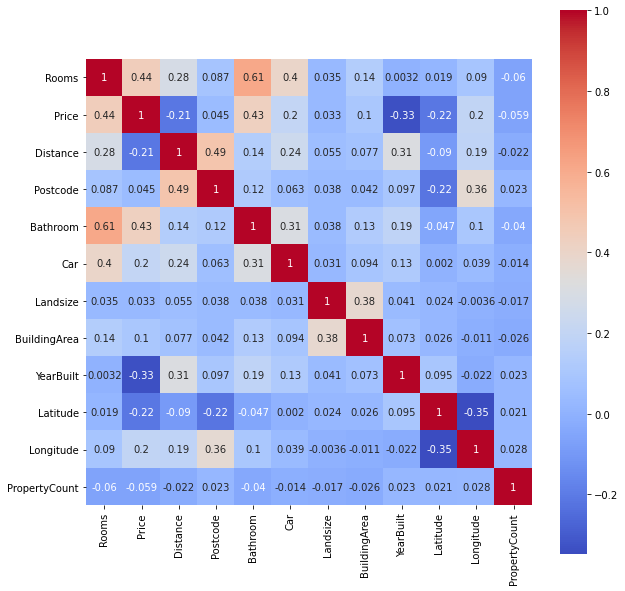

In [930]:
corrmat = data.corr()

f, ax = plt.subplots(figsize=(10, 10))
sbrn.heatmap(corrmat, annot=True, square=True, cmap='coolwarm');

In [931]:
data = data.drop(columns=['PropertyCount', 'Postcode'])

In [932]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        27247 non-null  object 
 1   Rooms         20806 non-null  float64
 2   Type          27247 non-null  object 
 3   Price         27247 non-null  float64
 4   Method        27247 non-null  object 
 5   Seller        27247 non-null  object 
 6   Distance      27246 non-null  float64
 7   Bathroom      20800 non-null  float64
 8   Car           20423 non-null  float64
 9   Landsize      17982 non-null  float64
 10  BuildingArea  10656 non-null  float64
 11  YearBuilt     12084 non-null  float64
 12  CouncilArea   27244 non-null  object 
 13  Latitude      20993 non-null  float64
 14  Longitude     20993 non-null  float64
 15  RegionName    27244 non-null  object 
dtypes: float64(10), object(6)
memory usage: 3.5+ MB


In [933]:
data = data[~data['Rooms'].isnull()]
data = data[~data['Bathroom'].isnull()]
data = data[~data['Latitude'].isnull()]
data = data[~data['Longitude'].isnull()]
data = data[~data['Landsize'].isnull()]

## Hot Encode Type

In [934]:
ohe = OneHotEncoder()
print(np.unique(data['Type']))
# X_train_enc = ohe.fit_transform(data)

type_col = ohe.fit_transform(data.Type.values.reshape(-1, 1)).toarray()
type_col

['h' 't' 'u']


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [935]:
for i in range(len(type_col[0])):
    arr = []
    for x in type_col:
        arr.append(x[i])
    data[f'Type_{i}'] = arr

## Hot Encode Method

In [936]:
ohe = OneHotEncoder()
print(np.unique(data['Method']))
method_col = ohe.fit_transform(data.Type.values.reshape(-1, 1)).toarray()

['PI' 'S' 'SA' 'SP' 'VB']


In [937]:
for i in range(len(method_col[0])):
    arr = []
    for x in method_col:
        arr.append(x[i])
    data[f'Method{i}'] = arr

## Hot Encode CouncilArea

In [938]:
ohe = OneHotEncoder()
print(np.unique(data['CouncilArea']))
CouncilArea_col = ohe.fit_transform(data.CouncilArea.values.reshape(-1, 1)).toarray()

for i in range(len(CouncilArea_col[0])):
    arr = []
    for x in CouncilArea_col:
        arr.append(x[i])
    data[f'CouncilArea{i}'] = arr

['Banyule City Council' 'Bayside City Council' 'Boroondara City Council'
 'Brimbank City Council' 'Cardinia Shire Council' 'Casey City Council'
 'Darebin City Council' 'Frankston City Council' 'Glen Eira City Council'
 'Greater Dandenong City Council' 'Hobsons Bay City Council'
 'Hume City Council' 'Kingston City Council' 'Knox City Council'
 'Macedon Ranges Shire Council' 'Manningham City Council'
 'Maribyrnong City Council' 'Maroondah City Council'
 'Melbourne City Council' 'Melton City Council' 'Mitchell Shire Council'
 'Monash City Council' 'Moonee Valley City Council'
 'Moorabool Shire Council' 'Moreland City Council'
 'Nillumbik Shire Council' 'Port Phillip City Council'
 'Stonnington City Council' 'Whitehorse City Council'
 'Whittlesea City Council' 'Wyndham City Council' 'Yarra City Council'
 'Yarra Ranges Shire Council']


In [939]:
data = data.drop(columns=['Type', 'Suburb', 'RegionName', 'Seller', 'CouncilArea', 'Method', 'BuildingArea'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17951 entries, 1 to 34856
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          17951 non-null  float64
 1   Price          17951 non-null  float64
 2   Distance       17951 non-null  float64
 3   Bathroom       17951 non-null  float64
 4   Car            17679 non-null  float64
 5   Landsize       17951 non-null  float64
 6   YearBuilt      10613 non-null  float64
 7   Latitude       17951 non-null  float64
 8   Longitude      17951 non-null  float64
 9   Type_0         17951 non-null  float64
 10  Type_1         17951 non-null  float64
 11  Type_2         17951 non-null  float64
 12  Method0        17951 non-null  float64
 13  Method1        17951 non-null  float64
 14  Method2        17951 non-null  float64
 15  CouncilArea0   17951 non-null  float64
 16  CouncilArea1   17951 non-null  float64
 17  CouncilArea2   17951 non-null  float64
 18  Counci

In [940]:
data = data.apply(lambda x: x.fillna(x.mean()),axis=0)
data.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Latitude,Longitude,Type_0,...,CouncilArea23,CouncilArea24,CouncilArea25,CouncilArea26,CouncilArea27,CouncilArea28,CouncilArea29,CouncilArea30,CouncilArea31,CouncilArea32
1,2.0,1480000.0,2.5,1.0,1.0,202.0,1965.2398,-37.7996,144.9984,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,1035000.0,2.5,1.0,0.0,156.0,1900.0000,-37.8079,144.9934,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.0,1465000.0,2.5,2.0,0.0,134.0,1900.0000,-37.8093,144.9944,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,3.0,850000.0,2.5,2.0,1.0,94.0,1965.2398,-37.7969,144.9969,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,3.5,1600000.0,2.5,1.0,2.0,120.0,2014.0000,-37.8072,144.9941,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [941]:
Y = data['Price'].to_numpy()
X = data.drop(columns=['Price']).to_numpy()
X[:5]

array([[ 2.0000000e+00,  2.5000000e+00,  1.0000000e+00,  1.0000000e+00,
         2.0200000e+02,  1.9652398e+03, -3.7799600e+01,  1.4499840e+02,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 2.0000000e+00,  2.5000000e+00,  1.0000000e+00,  0.0000000e+00,
         1.5600000e+02,  1.9000000e+03, -3.7807900e+01,  1.4499340e+02,
       

In [942]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x = scaler_x.fit_transform(X_train)
y = scaler_y.fit_transform(y_train.reshape(len(y_train),1))[:,0]

In [943]:
print(x.shape)
n = x.shape[1]

(14360, 47)


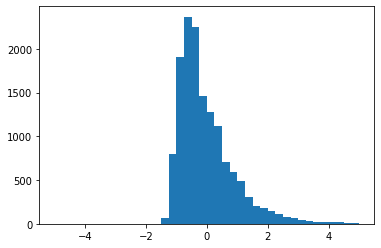

In [944]:
fig, ax = plt.subplots()
hist = ax.hist(y, bins=40, range=[-5, 5])

# ANN

In [905]:
model = Sequential()
model.add(Dense(96, activation='relu', input_shape=(n,)))
model.add(Dense(96, activation='relu', kernel_regularizer='l2', kernel_initializer='he_uniform'))
model.add(Dense(48, kernel_regularizer='l2', kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(48, kernel_regularizer='l2', kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(16, kernel_regularizer='l2', kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(8, kernel_regularizer='l2', kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1, activation='linear'))

In [906]:
model.compile(optimizer=Adam(lr=0.001), 
              loss='mean_squared_error', metrics=['mse'])

In [907]:
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, min_lr=0.00005)
early_stopping = EarlyStopping(monitor="val_loss", patience=7)
history = model.fit(x, y, epochs=150, batch_size=128, validation_split=0.1, 
                  callbacks=[reduce_lr, early_stopping], verbose=1)

Epoch 1/150
101/101 [==============================] - 1s 3ms/step - loss: 4.7245 - mse: 0.8209 - val_loss: 2.9702 - val_mse: 0.2847
Epoch 2/150
101/101 [==============================] - 0s 2ms/step - loss: 2.6535 - mse: 0.2865 - val_loss: 1.8706 - val_mse: 0.2846
Epoch 3/150
101/101 [==============================] - 0s 2ms/step - loss: 1.6906 - mse: 0.2809 - val_loss: 1.2379 - val_mse: 0.2554
Epoch 4/150
101/101 [==============================] - 0s 2ms/step - loss: 1.1517 - mse: 0.2677 - val_loss: 0.9149 - val_mse: 0.2703
Epoch 5/150
101/101 [==============================] - 0s 2ms/step - loss: 0.8680 - mse: 0.2792 - val_loss: 0.7003 - val_mse: 0.2503
Epoch 6/150
101/101 [==============================] - 0s 2ms/step - loss: 0.6988 - mse: 0.2826 - val_loss: 0.5836 - val_mse: 0.2507
Epoch 7/150
101/101 [==============================] - 0s 2ms/step - loss: 0.5846 - mse: 0.2712 - val_loss: 0.5065 - val_mse: 0.2474
Epoch 8/150
101/101 [==============================] - 0s 2ms/step - 

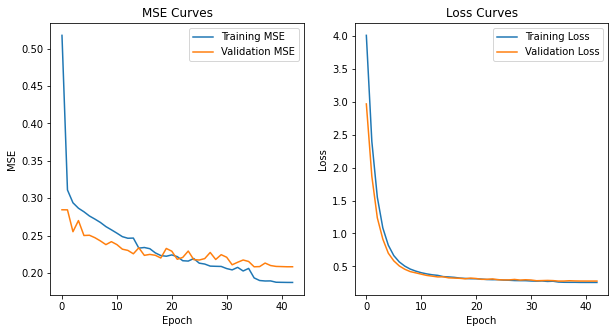

In [908]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Training MSE',
           'Validation MSE'])
plt.title('MSE Curves')
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [909]:
X_scaled_test = scaler_x.transform(X_test)
y_scaled_test = scaler_y.transform(y_test.reshape(len(y_test),1))[:,0]
results = model.predict(X_scaled_test)

In [910]:
print('              pred --- real')
for i, j in zip(results[:20], y_scaled_test[:20]):
    print(f'{i[0]} --- {j}')

              pred --- real
1.2554881572723389 --- 2.067582911172597
0.18633028864860535 --- 0.0557905796018997
0.3065919578075409 --- 0.8543646348818713
-0.33925214409828186 --- 0.31686286690496734
0.6578493118286133 --- 1.0693653420726328
-0.5871070623397827 --- -0.7197476856219188
1.1726230382919312 --- 0.915793408364946
-0.6533254384994507 --- -0.07628128338671099
0.6558600664138794 --- 0.671614033769724
-0.42739322781562805 --- -0.2667104811842427
1.296925663948059 --- 0.7668286326684898
0.4970109760761261 --- 0.009718999489593642
-0.3876730501651764 --- -0.5354613651726946
-0.8815683126449585 --- -0.9961771662957551
2.5187010765075684 --- 3.419015927800242
-0.2532106339931488 --- -0.06706696736424977
-0.6590143442153931 --- -0.7581406690488406
0.7073373794555664 --- 0.04043338623113101
-1.0038583278656006 --- -1.05760593977883
-0.531688928604126 --- -0.589211541970385


In [911]:
y_scaled_test[:20]

array([ 2.06758291,  0.05579058,  0.85436463,  0.31686287,  1.06936534,
       -0.71974769,  0.91579341, -0.07628128,  0.67161403, -0.26671048,
        0.76682863,  0.009719  , -0.53546137, -0.99617717,  3.41901593,
       -0.06706697, -0.75814067,  0.04043339, -1.05760594, -0.58921154])

In [912]:
r2_score(results, y_scaled_test)

0.7477982751216442

# SVM

In [946]:
param_grid = {'C': [0.1, 1, 10, 50], 'gamma': ['scale', 1, 0.1, 0.01, 0.001], 
                  'kernel': ['rbf']}
grid = GridSearchCV(SVR(), param_grid, verbose=2, refit=True, n_jobs=-1)
grid.fit(x, y)
print(grid.best_params_)
svm = SVR(kernel=grid.best_params_['kernel'], C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [947]:
svm.fit(x, y)

SVR(C=50)

In [950]:
svm_results = svm.predict(X_scaled_test)

In [951]:
r2_score(svm_results, y_scaled_test)

0.7213271614362604

In [953]:
print('              pred --- real')
for i, j in zip(svm_results[:20], y_scaled_test[:20]):
    print(f'{i} --- {j}')

              pred --- real
1.3161661002303209 --- 2.067582911172597
0.055209739205301145 --- 0.0557905796018997
0.2149935704161231 --- 0.8543646348818713
-0.34598795738914123 --- 0.31686286690496734
0.9408791070672163 --- 1.0693653420726328
-0.6896650033545891 --- -0.7197476856219188
1.083293521522327 --- 0.915793408364946
-0.6030417265287794 --- -0.07628128338671099
0.8704334654160918 --- 0.671614033769724
-0.3770414551796043 --- -0.2667104811842427
1.2371396516170137 --- 0.7668286326684898
0.26128154328955244 --- 0.009718999489593642
-0.3584704927195491 --- -0.5354613651726946
-0.8383976303657582 --- -0.9961771662957551
2.3765026687545685 --- 3.419015927800242
-0.20749505030831894 --- -0.06706696736424977
-0.7224005547495816 --- -0.7581406690488406
0.5343401875403756 --- 0.04043338623113101
-0.9668029035929163 --- -1.05760593977883
-0.6591600226551096 --- -0.589211541970385
